# Imports

In [20]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Read Images

In [10]:
imagep = './assets/cat.jpg'

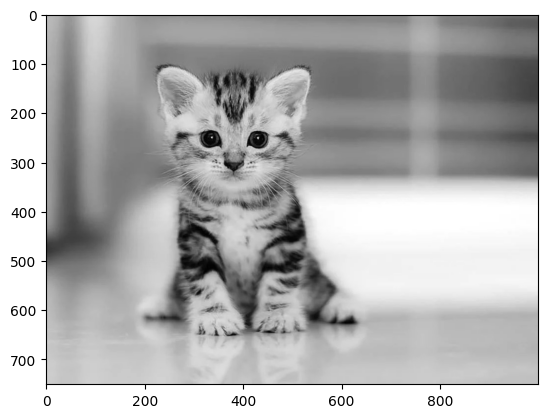

In [15]:
image = cv2.imread(imagep, cv2.IMREAD_GRAYSCALE)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)

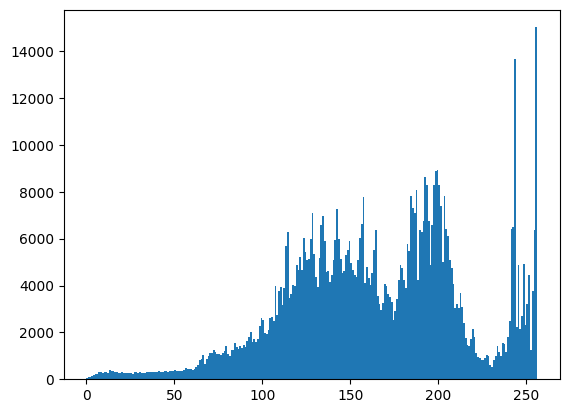

In [18]:
histg = cv2.calcHist([image], [0], None, [256], [0, 256])
plt.hist(image.ravel(), 256, [0,256])
plt.show()

In [23]:
within = []
for i in range(len(histg)):
    x, y = np.split(histg, [i])
    x1 = np.sum(x)/(image.shape[0] * image.shape[1])
    y1 = np.sum(y)/(image.shape[0] * image.shape[1])
    x2 = np.sum([j*t for j, t in enumerate(x)])/np.sum(x)
    y2 = np.sum([j*t for j, t in enumerate(y)])/np.sum(y)
    x3 = np.sum([(j-x2)**2*t for j, t in enumerate(x)])/np.sum(x)
    x3 = np.nan_to_num(x3)
    y3 = np.sum([(j-y2)**2*t for j, t in enumerate(y)])/np.sum(y)
    within.append(x1*x3 + y1+y3)

m = np.argmin(within)
print(m)



/var/folders/k7/vnd5ym5n7vx1y3gkc1l0fx4m0000gn/T/ipykernel_2372/3438086523.py:6: RuntimeWarning: invalid value encountered in scalar divide
  x2 = np.sum([j*t for j, t in enumerate(x)])/np.sum(x)
/var/folders/k7/vnd5ym5n7vx1y3gkc1l0fx4m0000gn/T/ipykernel_2372/3438086523.py:8: RuntimeWarning: invalid value encountered in scalar divide
  x3 = np.sum([(j-x2)**2*t for j, t in enumerate(x)])/np.sum(x)


168


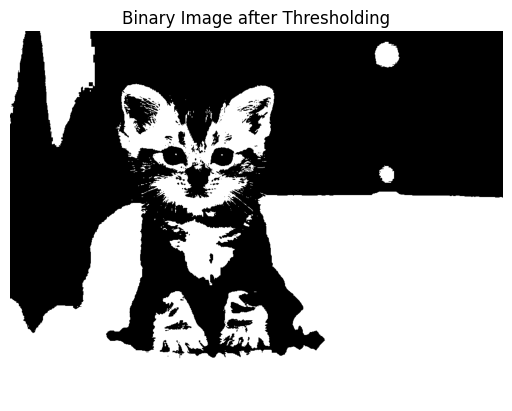

In [25]:
(thresh, bin) = cv2.threshold(image, m, 256, cv2.THRESH_BINARY)
plt.imshow(bin, cmap='gray')
plt.axis('off')
plt.title('Binary Image after Thresholding')
plt.show()

# References

1. Matplotlib Subplot: https://www.geeksforgeeks.org/how-to-display-multiple-images-in-one-figure-correctly-in-matplotlib/#
2. OTSU Thresholding: https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html
3. Images taken from google. For personal usage, and not for commercial usage.